In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 16
learning_rate = 0.0003
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")


2024-12-23 20:11:23,241 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-23 20:11:23,242 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-23 20:11:23,254 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-23 20:11:23,257 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-23 20:11:23,261 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-23 20:11:23,262 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-23 20:11:23,262 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-23 20:11:23,263 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-23 20:11:23,266 - INFO - Class 'fire' has 730 samples.
2024-12-23 20:11:23,269 - INFO - Class 'nofire' has 1157 samples.
2024-12-23 20:11:23,270 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 0.

[INFO] Loading datasets...


2024-12-23 20:11:25,474 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: efficienetnet\n")
print("[INFO] Initializing efficienetnet model...")
model = initialize_model(
    model_name="efficientnet_b0",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: efficienetnet

[INFO] Initializing efficienetnet model...
[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/efficientnet.pt",
    early_stop_patience=12,
    monitor_metric="val_f1",
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_f1: 0.8075
Epoch [1]: Train Loss: 0.6169, Train Acc: 0.6720 | Val Loss: 0.5266, Val Acc: 0.7687, Val Recall: 0.7927, Val F1: 0.8075


[INFO] Best model saved with val_f1: 0.8421
Epoch [2]: Train Loss: 0.5293, Train Acc: 0.7636 | Val Loss: 0.4602, Val Acc: 0.8060, Val Recall: 0.8455, Val F1: 0.8421


[INFO] Best model saved with val_f1: 0.8479
Epoch [3]: Train Loss: 0.4525, Train Acc: 0.8087 | Val Loss: 0.4309, Val Acc: 0.8134, Val Recall: 0.8496, Val F1: 0.8479


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [4]: Train Loss: 0.4318, Train Acc: 0.8156 | Val Loss: 0.4238, Val Acc: 0.8010, Val Recall: 0.8171, Val F1: 0.8340


[INFO] Best model saved with val_f1: 0.8601
Epoch [5]: Train Loss: 0.4447, Train Acc: 0.8018 | Val Loss: 0.3969, Val Acc: 0.8308, Val Recall: 0.8496, Val F1: 0.8601


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [6]: Train Loss: 0.4150, Train Acc: 0.8182 | Val Loss: 0.3911, Val Acc: 0.8209, Val Recall: 0.8293, Val F1: 0.8500


[INFO] Best model saved with val_f1: 0.8694
Epoch [7]: Train Loss: 0.3994, Train Acc: 0.8262 | Val Loss: 0.3810, Val Acc: 0.8408, Val Recall: 0.8659, Val F1: 0.8694


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [8]: Train Loss: 0.4026, Train Acc: 0.8272 | Val Loss: 0.3772, Val Acc: 0.8383, Val Recall: 0.8211, Val F1: 0.8614


[INFO] Best model saved with val_f1: 0.8704
Epoch [9]: Train Loss: 0.3998, Train Acc: 0.8161 | Val Loss: 0.3592, Val Acc: 0.8408, Val Recall: 0.8740, Val F1: 0.8704


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [10]: Train Loss: 0.3967, Train Acc: 0.8230 | Val Loss: 0.3673, Val Acc: 0.8284, Val Recall: 0.8577, Val F1: 0.8595


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [11]: Train Loss: 0.3764, Train Acc: 0.8325 | Val Loss: 0.3711, Val Acc: 0.8458, Val Recall: 0.8455, Val F1: 0.8703


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [12]: Train Loss: 0.3623, Train Acc: 0.8447 | Val Loss: 0.3615, Val Acc: 0.8333, Val Recall: 0.8415, Val F1: 0.8607


[INFO] Best model saved with val_f1: 0.8730
Epoch [13]: Train Loss: 0.3682, Train Acc: 0.8347 | Val Loss: 0.3644, Val Acc: 0.8458, Val Recall: 0.8659, Val F1: 0.8730


[INFO] Best model saved with val_f1: 0.8835
Epoch [14]: Train Loss: 0.3609, Train Acc: 0.8378 | Val Loss: 0.3465, Val Acc: 0.8557, Val Recall: 0.8943, Val F1: 0.8835


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [15]: Train Loss: 0.3690, Train Acc: 0.8400 | Val Loss: 0.3426, Val Acc: 0.8532, Val Recall: 0.8821, Val F1: 0.8803


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [16]: Train Loss: 0.3637, Train Acc: 0.8426 | Val Loss: 0.3469, Val Acc: 0.8458, Val Recall: 0.8618, Val F1: 0.8724


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [17]: Train Loss: 0.3654, Train Acc: 0.8384 | Val Loss: 0.3369, Val Acc: 0.8458, Val Recall: 0.8780, Val F1: 0.8745


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [18]: Train Loss: 0.3514, Train Acc: 0.8453 | Val Loss: 0.3410, Val Acc: 0.8483, Val Recall: 0.8618, Val F1: 0.8742


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [19]: Train Loss: 0.3607, Train Acc: 0.8357 | Val Loss: 0.3484, Val Acc: 0.8483, Val Recall: 0.8577, Val F1: 0.8737


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [20]: Train Loss: 0.3661, Train Acc: 0.8426 | Val Loss: 0.3519, Val Acc: 0.8333, Val Recall: 0.8659, Val F1: 0.8641


[INFO] Best model saved with val_f1: 0.8871
Epoch [21]: Train Loss: 0.3592, Train Acc: 0.8368 | Val Loss: 0.3309, Val Acc: 0.8607, Val Recall: 0.8943, Val F1: 0.8871


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [22]: Train Loss: 0.3587, Train Acc: 0.8405 | Val Loss: 0.3383, Val Acc: 0.8483, Val Recall: 0.8699, Val F1: 0.8753


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [23]: Train Loss: 0.3522, Train Acc: 0.8389 | Val Loss: 0.3439, Val Acc: 0.8507, Val Recall: 0.8577, Val F1: 0.8755


[INFO] Best model saved with val_f1: 0.8947
Epoch [24]: Train Loss: 0.3450, Train Acc: 0.8437 | Val Loss: 0.3278, Val Acc: 0.8706, Val Recall: 0.8984, Val F1: 0.8947


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [25]: Train Loss: 0.3414, Train Acc: 0.8447 | Val Loss: 0.3300, Val Acc: 0.8532, Val Recall: 0.8780, Val F1: 0.8798


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [26]: Train Loss: 0.3588, Train Acc: 0.8309 | Val Loss: 0.3283, Val Acc: 0.8657, Val Recall: 0.8984, Val F1: 0.8911


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [27]: Train Loss: 0.3493, Train Acc: 0.8490 | Val Loss: 0.3239, Val Acc: 0.8706, Val Recall: 0.8984, Val F1: 0.8947


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [28]: Train Loss: 0.3276, Train Acc: 0.8617 | Val Loss: 0.3220, Val Acc: 0.8682, Val Recall: 0.9024, Val F1: 0.8934


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [29]: Train Loss: 0.3749, Train Acc: 0.8331 | Val Loss: 0.3337, Val Acc: 0.8532, Val Recall: 0.8821, Val F1: 0.8803


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [30]: Train Loss: 0.3566, Train Acc: 0.8463 | Val Loss: 0.3355, Val Acc: 0.8557, Val Recall: 0.8902, Val F1: 0.8831


[INFO] No improvement in val_f1. Patience: 7/12
Epoch [31]: Train Loss: 0.3344, Train Acc: 0.8516 | Val Loss: 0.3279, Val Acc: 0.8632, Val Recall: 0.8862, Val F1: 0.8880


[INFO] No improvement in val_f1. Patience: 8/12
Epoch [32]: Train Loss: 0.3494, Train Acc: 0.8453 | Val Loss: 0.3258, Val Acc: 0.8507, Val Recall: 0.8984, Val F1: 0.8805


[INFO] No improvement in val_f1. Patience: 9/12
Epoch [33]: Train Loss: 0.3622, Train Acc: 0.8400 | Val Loss: 0.3175, Val Acc: 0.8657, Val Recall: 0.8984, Val F1: 0.8911


[INFO] No improvement in val_f1. Patience: 10/12
Epoch [34]: Train Loss: 0.3746, Train Acc: 0.8283 | Val Loss: 0.3211, Val Acc: 0.8607, Val Recall: 0.8902, Val F1: 0.8866


[INFO] No improvement in val_f1. Patience: 11/12
Epoch [35]: Train Loss: 0.3475, Train Acc: 0.8500 | Val Loss: 0.3180, Val Acc: 0.8507, Val Recall: 0.8659, Val F1: 0.8765


[INFO] No improvement in val_f1. Patience: 12/12
Epoch [36]: Train Loss: 0.3519, Train Acc: 0.8474 | Val Loss: 0.3227, Val Acc: 0.8607, Val Recall: 0.8862, Val F1: 0.8862
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 36 epochs. Best val_f1: 0.8947

[INFO] Training completed successfully!


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name="efficientnet",
    save_base_path="outputs/plots/baseline",

)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/baseline\efficientnet\efficientnet_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.864516129032258, 'recall': 0.8427672955974843, 'f1-score': 0.8535031847133758, 'support': 159.0}, 'Fire': {'precision': 0.9019607843137255, 'recall': 0.9163346613545816, 'f1-score': 0.9090909090909091, 'support': 251.0}, 'accuracy': 0.8878048780487805, 'macro avg': {'precision': 0.8832384566729918, 'recall': 0.8795509784760329, 'f1-score': 0.8812970469021424, 'support': 410.0}, 'weighted avg': {'precision': 0.8874395643387174, 'recall': 0.8878048780487805, 'f1-score': 0.8875337184176707, 'support': 410.0}}, 'confusion_matrix': [[134, 25], [21, 230]], 'roc_auc': 0.9556240447016964, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[INFO] Training plot saved to outputs/plots/baseline/efficientnet_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/baseline/efficientnet_baseline_confusion_matrix.png
[INFO] All results saved successfully!


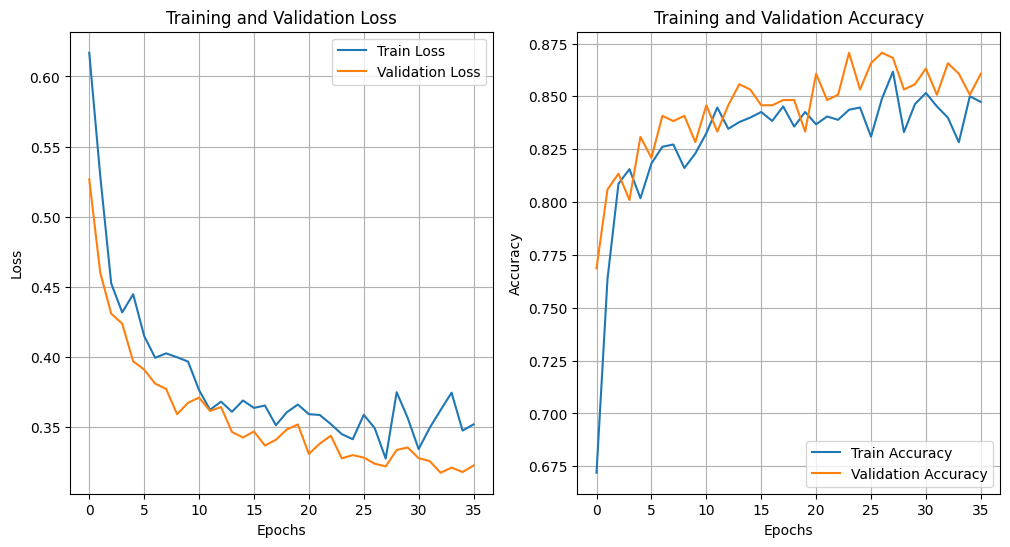

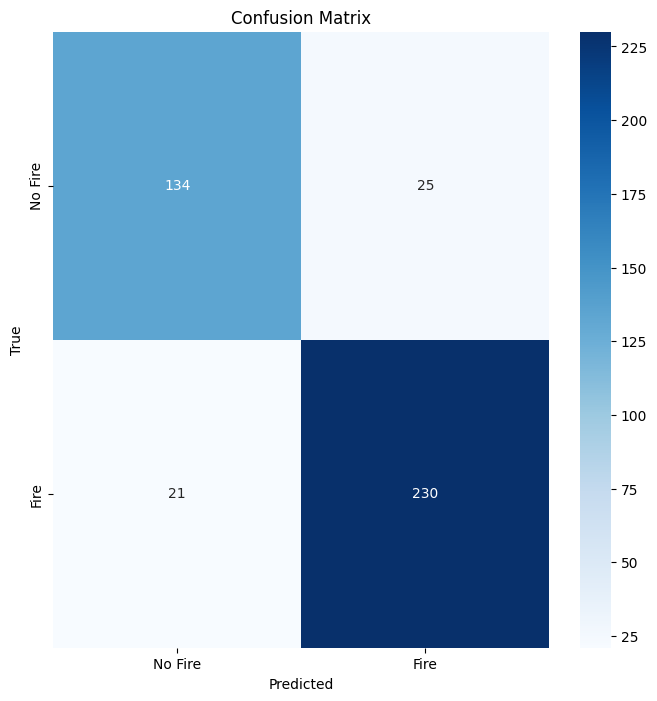

In [10]:
# Training and Validation Curves
plot_training(history, f"outputs/plots/baseline/efficientnet_baseline_training_curve.png")

# Confusion Matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/plots/baseline/efficientnet_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/efficientnet_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/efficientnet_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")